# importing necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm

# reading pandas

In [2]:
data = pd.read_csv("E:\download E\salaries.csv")

In [3]:
# printing the top five 
data.head() 

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
# printing last five
data.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [5]:
# datatype in dataset
data.dtypes

company                  object
job                      object
degree                   object
salary_more_then_100k     int64
dtype: object

# creating the dummy of categorical dtype to numerical dtype

In [6]:
company1 = pd.get_dummies(data['company'])

In [7]:
job1 = pd.get_dummies(data['job'])

In [8]:
degree1 = pd.get_dummies(data['degree'])

# dropping the unnecessary columns 

In [9]:
data = data.drop('company',axis = 1)
data = data.drop('job',axis = 1)
data = data.drop('degree',axis = 1)

# joining the converted data

In [10]:
data = data.join(company1)
data = data.join(job1)
data = data.join(degree1)

In [11]:
# checking null values
data.isnull().values.any()

False

In [12]:
# count of values in dataset
c = data.count()
print(c)

salary_more_then_100k    16
abc pharma               16
facebook                 16
google                   16
business manager         16
computer programmer      16
sales executive          16
bachelors                16
masters                  16
dtype: int64


1    10
0     6
Name: salary_more_then_100k, dtype: int64

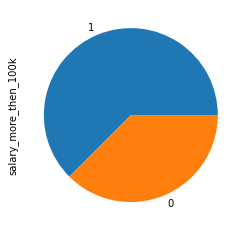

In [13]:
# pie plot of salary_more_then_100k
data['salary_more_then_100k'].value_counts().plot.pie()
data['salary_more_then_100k'].value_counts()

In [14]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   salary_more_then_100k  16 non-null     int64
 1   abc pharma             16 non-null     uint8
 2   facebook               16 non-null     uint8
 3   google                 16 non-null     uint8
 4   business manager       16 non-null     uint8
 5   computer programmer    16 non-null     uint8
 6   sales executive        16 non-null     uint8
 7   bachelors              16 non-null     uint8
 8   masters                16 non-null     uint8
dtypes: int64(1), uint8(8)
memory usage: 384.0 bytes


In [15]:
#dataset describe
data.describe()

,salary_more_then_100k,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
count,16.000,16.000000,16.000,16.000,16.000,16.000000,16.000000,16.000000,16.000000
mean,0.625,0.250000,0.375,0.375,0.375,0.312500,0.312500,0.500000,0.500000
std,0.500,0.447214,0.500,0.500,0.500,0.478714,0.478714,0.516398,0.516398
min,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
25%,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
50%,1.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.500000,0.500000
75%,1.000,0.250000,1.000,1.000,1.000,1.000000,1.000000,1.000000,1.000000
max,1.000,1.000000,1.000,1.000,1.000,1.000000,1.000000,1.000000,1.000000


In [18]:
#taking only first three col
X = data[data.columns[:3]]
print(X.shape)
X

(16, 3)


,salary_more_then_100k,abc pharma,facebook
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0
5,1,0,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,1,0


In [20]:
# taking class label 
y = data['salary_more_then_100k']
print(y.shape)
y

(16,)


0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

# spliting of data in 80:20 ratio

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# creating model
obj= svm.SVC()

In [28]:
# fit the model
obj.fit(X_train,y_train)

SVC()

In [29]:
# predict the model
y_pred=obj.predict(X_test)

In [30]:
print(y_pred)

[0 0 0 1]


In [31]:
# accuracy of the model
accuracy_score(y_pred,y_test)

1.0